In [2]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-k6u605r2
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-k6u605r2
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=179812 sha256=00e1b98e9a7f8ac5325617360df6373077a8f3b20e62c72f5f1da0e51d20b190
  Stored in directory: /tmp/pip-ephem-wheel-cache-qt17l6ba/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [3]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow

In [4]:
X = np.load('../content/images28_28.npy')
y = np.load('../content/labels28_28.npy')

In [5]:
tain_size=0.7
valid_size = 0.1
test_size = 0.2
valid_test_split = valid_size / test_size

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=1-tain_size, shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=valid_test_split, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(7010, 28, 28, 3) (7010, 7)
(1503, 28, 28, 3) (1503, 7)
(1502, 28, 28, 3) (1502, 7)


In [14]:
def get_callbacks():
  return [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)      
  ]

In [15]:
histories = {}

In [16]:
dnn_model = tf.keras.Sequential([                                                               
   keras.layers.Flatten(input_shape=(28, 28, 3)),
   keras.layers.Dense(128, activation = 'relu'),
   keras.layers.Dense(7, activation='softmax')                                 
])
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
dnn_hist = dnn_model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=get_callbacks(), verbose=0)

In [18]:
histories['dnn'] = dnn_hist

(0.0, 1.0)

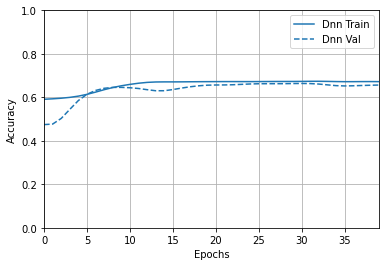

In [23]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)
plt.ylim([0, 1])

In [24]:
cnn_model = tf.keras.Sequential([                                                               
   keras.layers.Conv2D(28, (3, 3), activation = 'relu', input_shape=(28, 28, 3)),
   keras.layers.MaxPooling2D(2, 2),
   keras.layers.Conv2D(56, (3, 3), activation = 'relu'),
   keras.layers.MaxPooling2D(2, 2),
   keras.layers.Conv2D(56, (3, 3), activation = 'relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(56, activation='relu'),
   keras.layers.Dense(7, activation='softmax')                                 
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
cnn_hist = cnn_model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=get_callbacks(), verbose=0)

In [26]:
histories['cnn'] = cnn_hist

(0.0, 1.0)

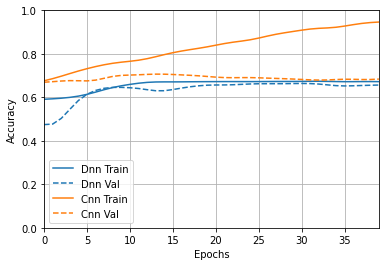

In [27]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)
plt.ylim([0, 1])